<a href="https://colab.research.google.com/github/mhtefe/deepLearning/blob/master/torchNotes/1_3_TensorMetadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Views of another tensor’s storage

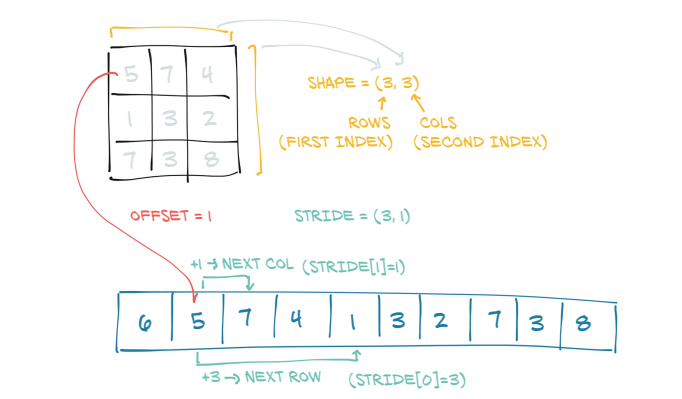

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points.stride())
print(points.storage_offset())

print("-"*50)

second_point = points[1]
print(second_point)
print(second_point.storage_offset())
print(second_point.size())

print("-"*50)

points[1,0] = -1 # directly change value in point
print(points)

second_point[0] = 0 # also alter values in second_point[0]
print(points)

second_point[:] = torch.tensor([-10, -10]) # also alters values in points[1]
print(points)


(2, 1)
0
--------------------------------------------------
tensor([5., 3.])
2
torch.Size([2])
--------------------------------------------------
tensor([[ 4.,  1.],
        [-1.,  3.],
        [ 2.,  1.]])
tensor([[4., 1.],
        [0., 3.],
        [2., 1.]])
tensor([[  4.,   1.],
        [-10., -10.],
        [  2.,   1.]])


In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone() # creates a new tensor 
second_point[0] = 10.0 # won't do anything to points
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

# Transposing without copying

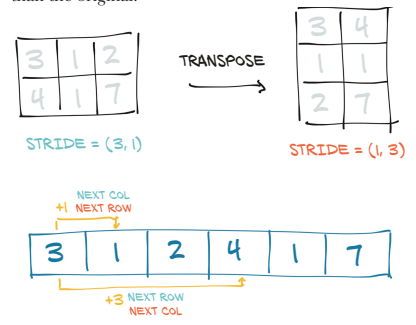

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [ ]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [ ]:
id(points.storage()) == id(points_t.storage())

True

In [ ]:
print(points.stride())
print(points_t.stride())

(2, 1)
(1, 2)


# Transposing Higher Dimensions

In [ ]:
some_t = torch.ones(3, 4, 5)
transpose_t = some_t.transpose(0, 2)
print(some_t.shape)
print(transpose_t.shape)

torch.Size([3, 4, 5])
torch.Size([5, 4, 3])


In [ ]:
print(some_t.stride())
print(transpose_t.stride())

(20, 5, 1)
(1, 5, 20)


In [ ]:
another_t = torch.transpose(some_t, 0,1)
print(another_t.shape)
print(another_t.stride())

torch.Size([4, 3, 5])
(5, 20, 1)


A tensor whose values are laid out in the storage starting from the rightmost dimension onward (that is, moving along rows for a 2D tensor) is defined as contiguous.
Contiguous tensors are convenient because we can visit them efficiently in order without jumping around in the storage (improving data locality improves performance
because of the way memory access works on modern CPUs). This advantage of course
depends on the way algorithms visit.

# Contiguous Tensors

Some tensor operations in PyTorch only work on contiguous tensors, such as view,
which we’ll encounter in the next chapter. In that case, PyTorch will throw an informative exception and require us to call contiguous explicitly. It’s worth noting that
calling contiguous will do nothing (and will not hurt performance) if the tensor is
already contiguous.
In our case, points is contiguous, while its transpose is not:

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points.is_contiguous()

True

In [ ]:
points_t = points.t()
points_t.is_contiguous()

False

In [ ]:
points_t.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [ ]:
points_t.stride()

(1, 2)

In [ ]:
points_t_cont = points_t.contiguous()
points_t_cont

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [ ]:
points_t_cont.stride()

(3, 1)

In [ ]:
points_t_cont.storage()

 4.0
 5.0
 2.0
 1.0
 3.0
 1.0
[torch.FloatStorage of size 6]

# Excercise

Create a new tensor using b = a.view(3, 3). What does view do? Check
that a and b share the same storage.

In [ ]:
a = torch.ones((1,9)) 
print(a)
b = a.view(3,3)
print(b)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
id(a.storage()) == id(b.storage())

True

In [ ]:
a[0,0] = 2
b

tensor([[2., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
a[0] = 2
b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

# Another Excercise

Create a tensor c = b[1:,1:]. Predict and then check the size, offset, and
stride.

In [ ]:
a = torch.tensor( list(range(9)) )
b = a.view(3,3)
c = b[1:, 1:]
print(c)

# size, offset, and stride
print(c.shape)
print(c.storage_offset())
print(c.stride())


tensor([[4, 5],
        [7, 8]])
torch.Size([2, 2])
4
(3, 1)


In [ ]:
c[0,0] = -1
a

tensor([ 0,  1,  2,  3, -1,  5,  6,  7,  8])